Hello, Tim! 

My name is Maksim Bulatov. I will check your project. I hope my review will be helpful. 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Sample text
</div>

# Video Game Factors that Help Determine Their Success

The online store Ice sells video games all over the world. They want to know which video game factors can help determine how successful or unsuccesful a video game will be globally. Ice has provided data about video games from open sources that contain information on user and expert reviews, genres, gaming platforms, and historical data on game sales.

First, the data will be explored and any discrepancies or unsuitable data will be adjusted. Primarily, any missing values or incorrect data types will be targeted and corrected. Once the data is prepared for analysis, the global sales will be calculated for each video game by summing the regional sales together (NA, EU, JP, Other).

With the total sales obtained, the actual data analysis can begin. Certain data will be plotted and observed for any patterns that prove helpful in determining whether a video game will succeed or not. This will allow for potential big winners to be spotted and assist in planning a campaign for 2017.

Finally, two hypotheses will be tested concerning user ratings by platform and by genre. Ice wants to know if the average user ratings of the Xbox One and PC platforms are the same, and if the average user ratings for the Action and Sports genres are different. This will be the last analysis step before the report is wrapped up with the general conclusion.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done! Proper introduction is always important!
</div>

## Initialization

In this section the necessary libraries will be imported, the data will be read into a DataFrame, and a summary of the data will be explored

### Load libraries

All the important libraries that may be utilized throughout this report are imported in the below cell block.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import math
from scipy import stats as st
from matplotlib import pyplot as plt


In [2]:
# I found this code online for centering output images/plots/charts. Works well, will keep it in. Uses HTML 
# and defines CSS style rules

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
}""")

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great! All libraries are in one cell! 
</div>

### Load Data

The lone dataset will be read and stored into the DataFrame variable `df`.

In [3]:
# Load the data file 'games.csv' and store it in 'df'
df = pd.read_csv('/datasets/games.csv')

### Explore the data

Now, let's take a look at the general info about the data, and look at the first 15 rows.

In [4]:
# Print the general/summary information about the plans' DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are **16,715** rows in the dataset. However, it can be seen that some columns contain null (missing) values since their reported non-null values are less than **16,715**. The following columns are missing data:

- Name
- Year_of_Release
- Genre
- Critic_Score
- User_Score
- Rating

Most notably, the `'User_Score'` and `'Rating'` columns are missing nearly a third of their values. This will need to be looked at more closely later on.

When looking at data types, the `'Year_of_Release'` column should contain integers, and the `'User_Score'` column should contain float64 values. However, the `'Year_of_Release'` column contains values of the float64 data type, and the `'User_score'` column contains values of the object data type. These two data types will need to be convereted to more suitable data types.

In [5]:
# Print a sample of data for df
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


The data presented in the first 15 rows of the `df` DataFrame is as expected after already having looked at the data's summary info. However, when looking at the values stored in the `'Critic_Score'` column, it can be seen that the values are really just integers stored as float64 values. Therefore, the data type for the `'Critic_Score'` column can be converted to an integer data type. This will be done concurrently in the next section while the missing values are replaced.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Fully agree with your data exploration methods and comments! I like your code is clean and it is easy to follow your thoughts!
</div>

## Fix the data

In this section the issues and deficiencies mentioned in the last section will be addressed and corrected.

#### Fix the column names

Although not mentioned before, it will assist with future coding if all the column names are displayed in all lowercase letters. Such a change avoids having to capitalize letters when calling columns or variables, which can save some time in the long run. Below, the columns of the DataFrame `df` are stored as lowercase versions of themselves. The results are displayed for confirmation that this has successfully been completed.

In [6]:
# Change the column names to all lowercase
df.columns = df.columns.str.lower()

# Display the column names
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

#### Missing data and data types


In the subsection each column with missing values will be addressed, as well as their data types.

##### `'name'` column

Let's see how many rows there are that contain missing values in `'name'` column.

In [7]:
# Check for missing values
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There are only two rows that have missing values in the `'name'` column. Because that number is so small compared to the number of rows in the entire DataFrame, it's best to just remove the rows. The below cell block will drop those two rows from the DataFrame. Additionally, the data type for this column is suitable, so no further work is required in regards to the data type.

In [8]:
# There are only 2 rows that contain missing values in the 'name' column. Just remove them.
df.dropna(subset=['name'], inplace=True)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Perfect!
</div>

##### `'year_of_release'` column

Let's see how many rows there are that contain missing values in the `'years_of_release'` column.

In [9]:
# Check for missing values
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are **269** of rows that contain missing values in the `'year_of_release'` column. Since this is not a large amount of data (approximately **1.6%**), it is okay to just drop the rows containing missing values in the `'year_of_release'` column from the DataFrame. This will be done in the code block below.

In [10]:
# Remove (drop) the remaining 146 rows from the datatable that contain missing values in 'year_of_release'
df.dropna(subset=['year_of_release'], inplace=True)

Let's ensure all rows with missing values in the `'year_of_release'` column have been dropped from the DataFrame.

In [11]:
# Check for missing values
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


No missing values remain in the `'year_of_release'` column. Now let's address the data type of the `'year_of_release'` column, which is currently the float64 data type. Since the values represent years, we will convert all the values in the `'year_of_release'` column to integers.

In [12]:
# Change the data type
# Replace all NaN (missing) values in the 'year_of_release' column with 0, and change the data type of the 
# column to 'int'

df['year_of_release'] = df['year_of_release'].astype('int')

<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

I can see you have a strong skill in writing functions and using the python in general. Good idea to check for similar game names, probably the similar game names would be released in the same year, but could be also different, depending on country and platform, for example. So since the amount of missing values is so small we could just drop them right from the beginning.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Okay, understood! I will go ahead and drop all the rows with missing values in the `'year_of_release'` column from the DataFrame instead of using a function to replace the missing values.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Perfect!
</div>


##### `'genre'` column

Let's see how many rows contain missing values in the `'genre'` column.

In [13]:
# Check for missing values
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


It appears that after removal of the rows that contained missing values in the `'name'` or `year_of_release'` columns, that there are no remaining rows that contain missing values in the `'genre'` column. No futher action is required.

##### `'critic_score'` column

Let's see how many rows contain missing values in the `'critic_score'` column.

In [14]:
# Check for missing vlaues
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are **8,461** rows that contain missing values in the `'critic_score'` column. There are too many rows with missing data to just remove them, and it would be hard to accurately replace the missing values with other numeric values. So, the missing values in the `'critic_score'` column will be left as they are. Replacing the missing values with a string value or different numeric value would have undesireable effects when performing arithmetic operations on this column. 

Because the missing values will be left as `NaN`, the values in the column will be of the float64 data type. While not what was originally desired, it's also not detrimental to future analysis. There is no need to modify the column's data type, as it is currently float64.

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

You have accomplished a great amount of work to fill the missing values. But such a large chunk of missing data is unlikely to be recovered correctly from existing values. Sometimes missing values are also indication of some pattern in the data. You can either leave it as it is or fill the missing values with some random number or string.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Understood! I have deleted the function that replaced a portion of the missing values in the `'critic_score'` column. I have since decided to just leave the missing values as `NaN`. If I had replaced the missing values with a string value, arithmetic operations would have been difficult to execute. If I had replaced the missing values with a different number my calculations would have been effected unless the replacement values were filtered out. It is easiest to just leave the missing values as they are.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>

Well done!
</div>


##### `'user_score'` column

Let's see how many rows contain missing values in the `'user_score'` column.

In [15]:
# Check for missing values
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are **6,605** rows in the DataFrame that contain missing values in the `'user_score'` column. It is also important to note that some rows contain a string value of `'tbd'`, which stands for 'To Be Determined'. Let's see how many rows contain the `'tbd'` value in the `'user_score'` column.

In [16]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


There are **2,376** rows that contain the `'tbd'` value in the `'user_score`' column. The `'tbd'` and `NaN` values cannot be replaced with any accurate values, and there are too many rows to just drop. Since the missing values and the `'tbd'` values indicate unuable values, we can just change the `'tbd'` value to `NaN` so that everything is uniform. This will be done using the `pd.to_numeric()` function, where `'coerce'` will be passed to the `errors` parameter. The `'tbd'` values will be changed to `NaN`, while the string objects that represent numbers will be changed to actual numeric values of the float64 data type. This will allow for arithmetic operations to be performed using all the column values.

In [17]:
# Use the pd.to_numeric() function to change strings representing number to actual numeric values. Pass 'coerce' to 
# the errors parameter so that 'tbd' string values are changed to NaN, and NaN values are kept as NaN.

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [18]:
# Let's take a look at how many rows contain missing values. The total should be the sum of rows that previously 
# contained NaN or `tbd`, which is 8,981
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

As the comment above, you could just leave the missing values as it is for the same reason, it is unlikely to fill so many missing values by using the available data.
Great point of changing tbd to NaN, since it reperesents exactly the same. 
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Understood! I have deleted the function that replaced a portion of the missing values in the `'user_score'` column. I then decided to replace the `'tbd'` values with `NaN` so that the missing values and `'tbd'` values would both be `NaN`. This was done using the pd.to_numeric() function.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>

Correct!
</div>


##### `'rating'` column

Let's look at how many rows contain missing values in the `'rating'` column.

In [19]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are **6,699** rows in the dataset that contain missing values in the `'rating'` column.

At this current time, I am unaware of a way to accurately replace the missing values in the `'rating'` column with usable string values. So, the missing values will remain in this column. When it's time to compare the regional sales based on the video game ratings, the sample of data containing string values  in the `'rating'` column will be used.

<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Agree, it is not possible here to fill the missing values, based on our dataset. But maybe we can change some really rare ratings to most popular ones? What if we check the distribution of rating names? Which are the most popular and which ones the most rare ones? It might help us to make our dataset a bit better. 

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

See below. I checked the distribution, though nothing popped out at me.
</div>

Let's check the distribution of the rating values to see if any helpful information can be provided.

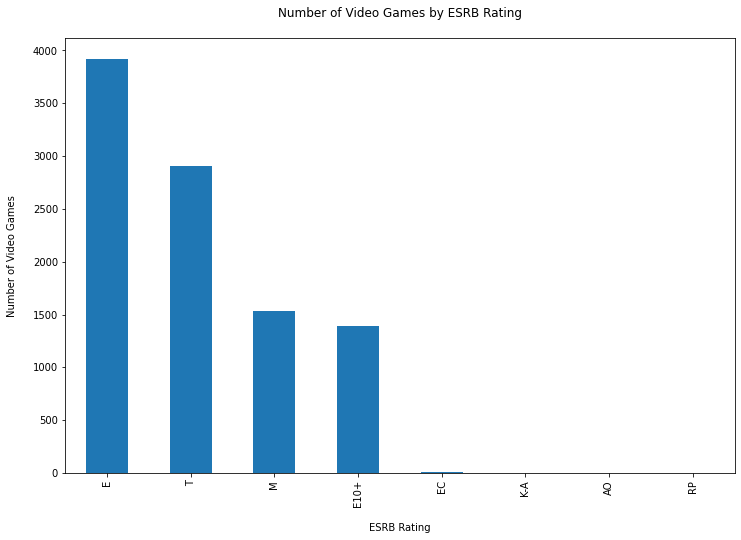

In [20]:
# Checking distribution of the values in the 'rating' column
df.groupby('rating')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(12,8))
plt.title('Number of Video Games by ESRB Rating\n')
plt.xlabel('\nESRB Rating')
plt.ylabel('Number of Video Games\n')
plt.show()

While there are a few very rare ratings, which may be a result of the missing values, I still don't see an accurate way to replace the missing values with any of the 4 rare ratings depicted above. The 4 rare ratings are `EC`, `K-A`, `RP`, and `AO`. I see that the `'EC'` rating appears to have more video games allotted to it then the other 3 rare ratings.

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>

The idea was to change ratings EC, K-A, RP and AO to the most popular ones E, T or M. Just to have cleaner dataset. It would not inffluence the evaluation at all. But it is fine like this too:)
</div>


#### Calculate the total sales

Now that the data has been prepared and curated for proper use, let's add some additioanl information that will assist in the data analysis. It is important to know how global sales of each video game compare to one another. So, an additional column will be added to the `df` DataFrame that contains the sum of the sales from all the regions for each video game.

In [21]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

Let's take a look at the DataFrame `df` to ensure that the new column looks alright.

In [22]:
# Print the first 15 rows of the DataFrame
df.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


<div class="alert alert-block alert-success">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done! You could also use the following code line: `df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)`
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Understood! Thank you for showing me that way of doing it. It is much simpler! I have implemented it above since it significantly reduces the runtime.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>

I am glad to help! Well done!
</div>


## Analyze the data

### Video game and sales distribution

Let's look at how many video games were released in each distinct year.

In [23]:
# Create a pivot table showing how many video games were released for each distinct year
df.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Let's get a visual representation of this data by plotting the above pivot table as a bar chart.

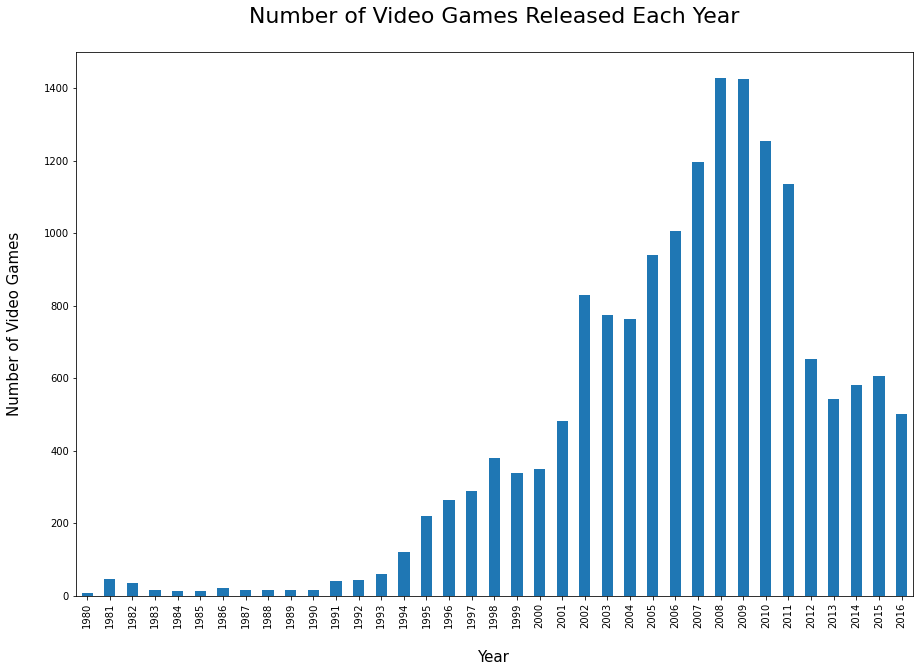

In [24]:
# Obtain the same pivot table as above and plot a bar chart with figsize=(15,10)
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(15,10))

# Add a title, xlabel, ylabel, and then plot
plt.title('Number of Video Games Released Each Year\n', fontsize=22)
plt.xlabel('\nYear', fontsize=15)
plt.ylabel('Number of Video Games\n', fontsize=15)
plt.legend().set_visible(False)
plt.show()


The vast majority of video games were released between 1995 and 2016, with the highest number of video games released between 2007 and 2010. The number of games released each year drastically started to decrease from **1,400** after 2009 until it leveld out in 2014 at around 600 games per year.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done! 
</div>

Let's look at how the total sales for video games varied by platform platform.

In [25]:
# Create a pivot table showing the total global sales for each platform. Sort in descending order.
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


The platforms with the highest sales are `'PS2'`, `'X360'`, `'PS3'`, `'Wii'`, and `'DS'`. Let's look at the sales distribution for each of these platforms based on sales per year.

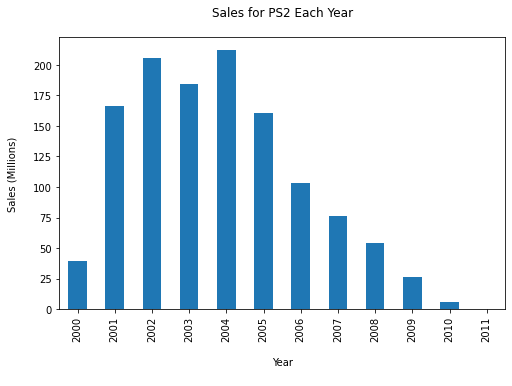

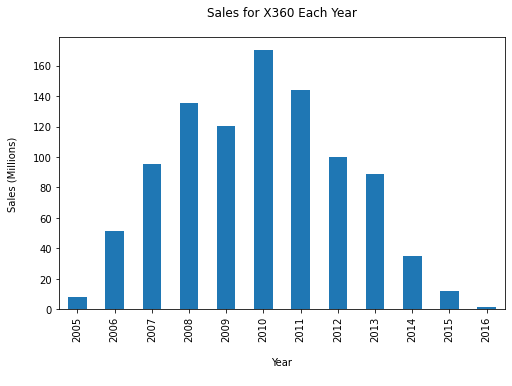

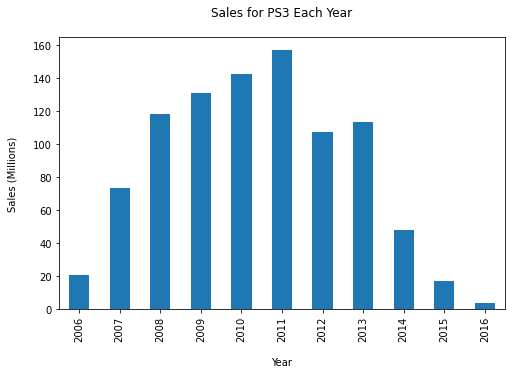

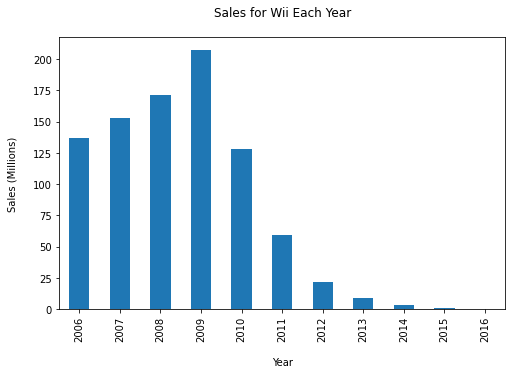

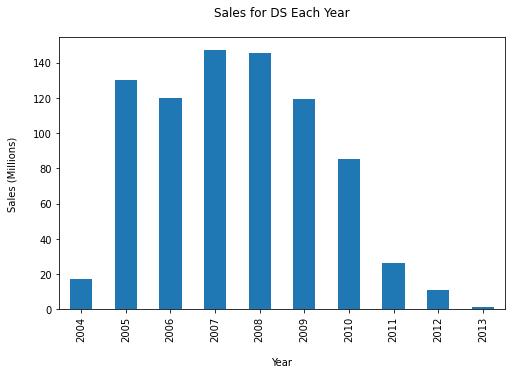

In [26]:
# Store the platforms into a list
high_selling_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Loop each platform name, obtain the data, and plot the total sales by year
for platform in high_selling_platforms:
    data = df[(df['platform'] == platform) & (df['year_of_release'] > 1999)].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', figsize = (8,5))
    plt.title('Sales for ' + platform + ' Each Year\n')
    plt.xlabel('\nYear\n')
    plt.ylabel('Sales (Millions)\n')
    plt.show()

All of the above platforms were at one point very popular, however they have all since faded away to where they have no sales have very few sales each year. From looking at the plots, it appears that it takes roughly **1-3** years for a new platform to really ramp up in popularity, where it stays relevant for **3-4** years, and then begins to fade away over the enxt **5-6** years. So, the total life span of a platform averages approximately **11** years. Since we just want to know which games will be successful next year, we only need to look at the most recent data. Therefore, the DataFrame will be sliced to only contain rows with data on video games released in the last 3 years.

In [27]:
# Obtaina data slice called 'sample_data' that contains all rows with year of release values between 2014 and 2016
sample_data = df.query('year_of_release >= 2014 and year_of_release <= 2016')

<div class="alert alert-block alert-danger">

<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

All graphs and working with tables are done great! Conclusion about the year period more than 5 years, can be misliding in the business. We are trying to predict the sales for the next year, does it really the span more than 5 years will help us here to identify the pattern? In reality 2 to 3 last years are taken into consideration. Games business is so dynamic, everything changes so fast. I am sure you can change it, all code is correct, just need to change the life span. 
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Okay! I see what you are saying. I will condence my span of data to a timeframe between 2014 and 2016. This takes into account 3 years of recent video game sales. I have updated my above code and paragraph.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>

Perfect!
</div>


In [28]:
# Group the data slice by platform, and then find the total global sales for each platform

grouped_sample = sample_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
grouped_sample

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

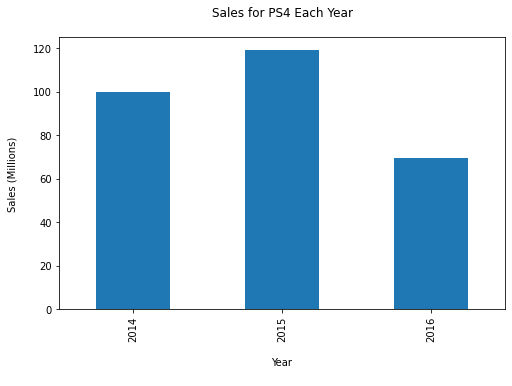

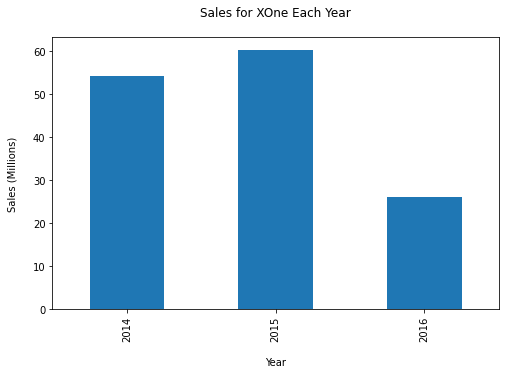

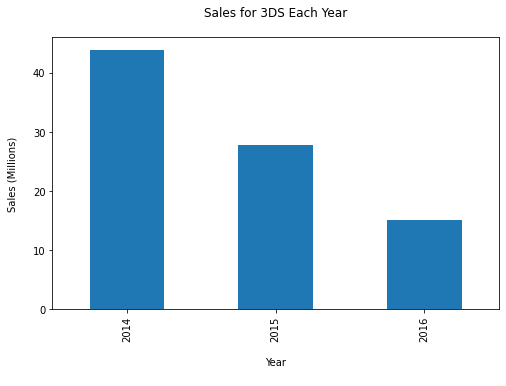

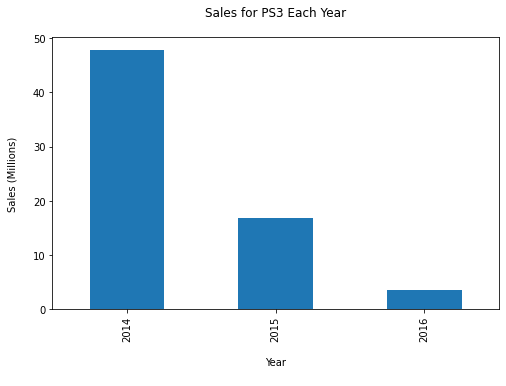

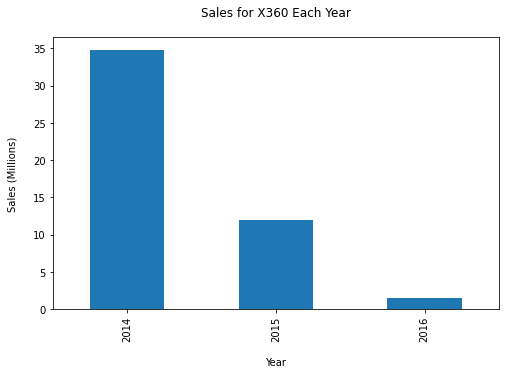

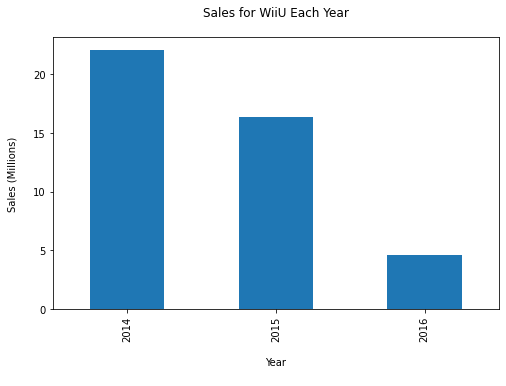

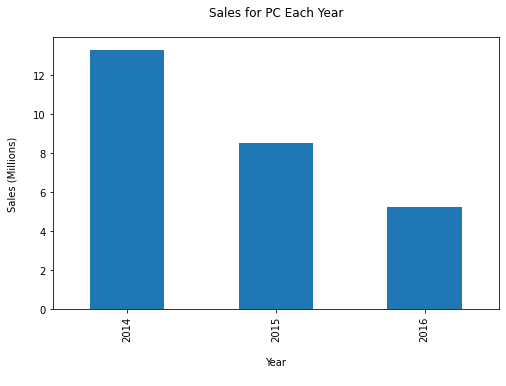

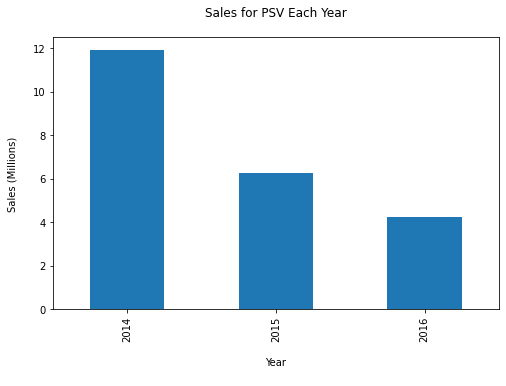

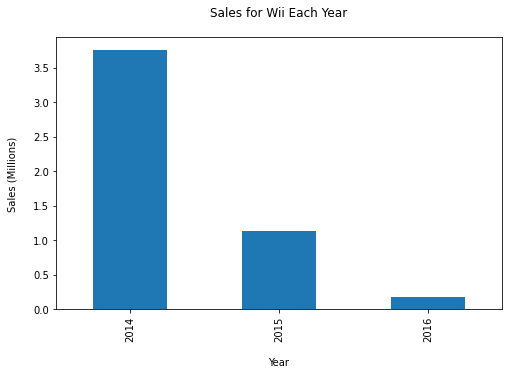

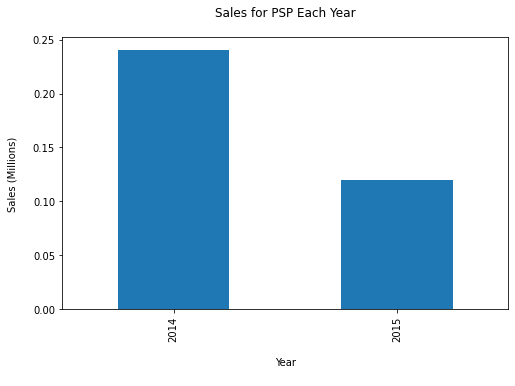

In [29]:
# Obtain the platform names for the 'grouped_sample' data slice
platforms = grouped_sample.index

# Loop each platform name to obtain the total sales distribution by year. Plot a bar chart. This is similar to what
# was previously done when plotting bar charts
for platform in platforms:
    sample_data[(sample_data['platform'] == platform)].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', figsize = (8,5))
    plt.title('Sales for ' + platform + ' Each Year\n')
    plt.xlabel('\nYear\n')
    plt.ylabel('Sales (Millions)\n')
    plt.show()
    

Global video game sales for the 3DS, Xbox 360, WiiU, PC, PSV, and Wii platforms have all been declining over the last 3 years. Video game sales for the PSP platform ended after 2015, so the platform is no longer relevant. The PS4 and Xbox One platforms appear to be leading the way in sales. The plots show a decrease in sales in 2016, however this may simply be because the data is incomplete. So, the platforms with the highest potential for profit are the PS4 and the Xbox One platforms.

<div class="alert alert-block alert-danger">

<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

I think the changing the year span would help also to see more platforms being also promising. What about WiiU or 3DS ? I think they have also the potential. Could you please correct it here?
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

After changing the span of the filtered data, I have analyzed the plots and updated my findings.
</div>

### Initialize the data

As was determined in the previous section, the potentially profitable platforms are the PS4, Xbox One, and PC. We will obtain individual data slices for video game sales pertaining to each platform, and then plot boxplots to visually examine the data's distribution. We will also look at boxplots for the 3DS, WiiU, and PSV platforms.

In [30]:
# Initialize datasets based on the platform
PS4_data = df.query('platform == "PS4"')[['platform', 'total_sales']]
XOne_data = df.query('platform == "XOne"')[['platform', 'total_sales']]
PC_data = df.query('platform == "PC" and year_of_release >= 2010')[['platform', 'total_sales']]


# 3DS, WiiU, PSV
threeDS_data = df.query('platform == "3DS"')[['platform', 'total_sales']]
WiiU_data = df.query('platform == "WiiU"')[['platform', 'total_sales']]
PSV_data = df.query('platform == "PSV"')[['platform', 'total_sales']]

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I've defined 3 other datasets in the above code block. Below I merged them all together into one DF. Pretty much got the boxplots together on one plot using brute force. Would really appreciate some guidance on this one, as I was fairly unsuccessful when looking back at previous material / searching online.
</div>

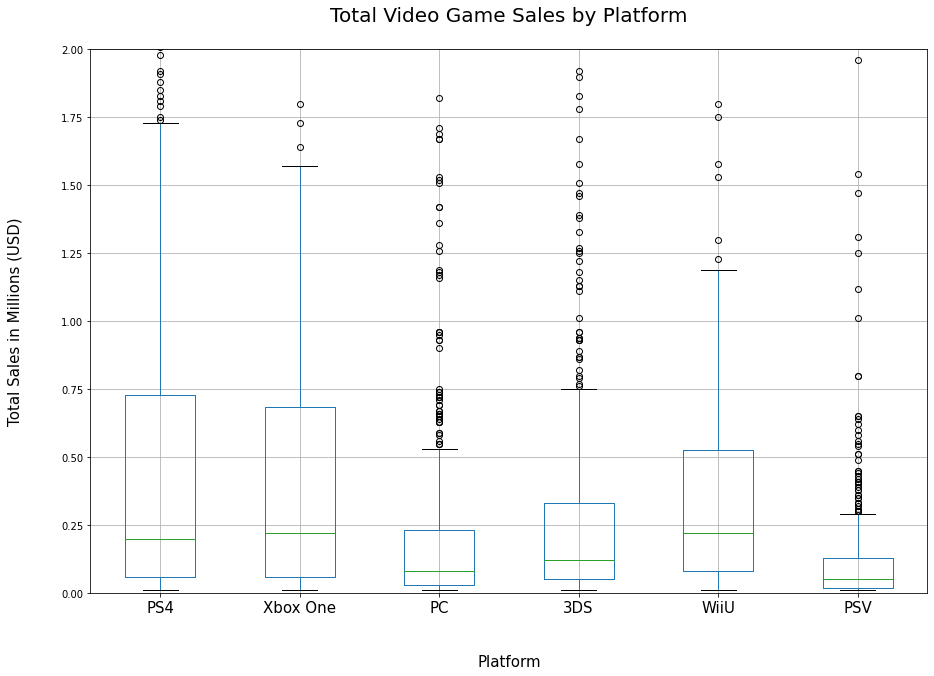

In [31]:
# This is pretty ugly coding, but managed to get boxplots together on one plot. Pretty much brute force here.
# Any help would be welcome. 

# Merge all the above DataFrames together on the 'platform' column
test_data = PS4_data.merge(XOne_data, on='platform', how='outer')
test_data = test_data.merge(PC_data, on='platform', how='outer')
test_data = test_data.merge(threeDS_data, on='platform', how='outer')
test_data = test_data.merge(WiiU_data, on='platform', how='outer')
test_data = test_data.merge(PSV_data, on='platform', how='outer')
#test_data.boxplot(['total_sales_x', 'total_sales_y'])
test_data.columns = ['platform', 'PS4', 'Xbox One', 'PC', '3DS', 'WiiU', 'PSV']
test_data.boxplot(figsize=(15,10))
plt.title('Total Video Game Sales by Platform\n', fontsize=20)
plt.xlabel('\n\nPlatform', fontsize=15)
plt.ylabel('Total Sales in Millions (USD)\n\n', fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(ymin=0, ymax=2)
plt.show()

Let's take a look at the average global sales of video games for each platform. We'll compare them to the medians and how each platform differs.

In [32]:
# Creat a list of platforms to look at
platforms = ['PS4', 'XOne', 'PC', '3DS', 'WiiU', 'PSV']

# Calculate and print the average sales for video games of each platform
for platform in platforms:
    average_sales = df.query('platform == @platform')['total_sales'].mean()
    print(f'{platform} average global sales: {round(average_sales,2)}')
    print()

PS4 average global sales: 0.8

XOne average global sales: 0.65

PC average global sales: 0.27

3DS average global sales: 0.5

WiiU average global sales: 0.56

PSV average global sales: 0.13



The medians for the PS4, Xbox One, and WiiU platforms all have high median sales that are around approximately **200,000 USD**. The PC, 3DS, and PSV platforms have fairly lower median sales. The PC and 3DS platforms have median sales around **100,000 USD**, and the PSV platform has the lowest median sales around **500,000 USD**. Additionally, the PS4, Xbox One, and WiiU have much larger ranges of values, especially on the higher end, than do the PC, 3DS, and PSV paltforms.

The average global sales for video games of each platform are distinctly higher than their median global sales. Video games of the PS4 platform have median global sales of approximately **200,000 USD**, but an average global sales value of approximately **800,000**. The average sales is 4 times as great as the median sales. This phenomenon of the mean global sales being significantly higher than the median global sales can be observed for every platform. The reasoning behind this is the large amount of outliers that drag the mean sales value up and away from the median sales value. There are video games for each platform that had sales in the millions, which is significantly higher than the median values of a few thousand dollars. These outlier video games have a huge affect on the mean global sales calculated for video games of each platform.

It can be noted that the sequence of mean global sales for each platform DOES NOT follow the same order as the median global sales for each platform. While the Xbox One has a higher median global sales value than the PS4, the PS4 has a much higher mean global sales value. 

It can be concluded that the platforms that bring in the highest global sales are the PS4, Xbox One, and WiiU.

#### PC data

<div class="alert alert-block alert-danger">

<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

I totally agree that PS4 and XBox One are the most popular platforms. It would be great to plot all the data in one graph to really see what candidates have the most of sales and the most usefull for our analyses. Also regarding the previuos comment, more platforms can be plot (I think there is one more platform that can be interesting to be analysed) and do not forget to put the title on all your axes. I am sure you can do this. 
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

As stated above, I could use some help with this. Was able to do it, but it's pretty ugly code. Was not successsful looking online/back at lessons.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Great work! I would not say you did an ugly code, it is pretty good. But here is my example:
    
    data = data.query('platform not in ["PS3", "X360", "Wii", "PSP"]') #you can filter the data this way
    plt.figure(figsize=(13, 8))
    (sns.boxplot(data = data, y = 'total_sales', x='platform')     #here we use the library: import seaborn as sns
    .set(title = 'Total Video Game Sales by Platform', xlabel = 'Platforms', ylabel = 'Total sales'))
    plt.show()
</div>

### User and professional reviews

Let's take a look at how user and critic ratings affect the total sales of a video game. To simply this analysis, let's just look at data for one popular platform, which will be the Xbox One. We have already obtained data on all video games for the Xbox One platform. In the below code blocks, scatter plots will be plotted to compare the the user and critic ratings against the total sales for each video game. Additionally, the correlation coefficient will be calculated for each scatter plot to assist in determining if any relationship exists.

#### User score affect on total sales

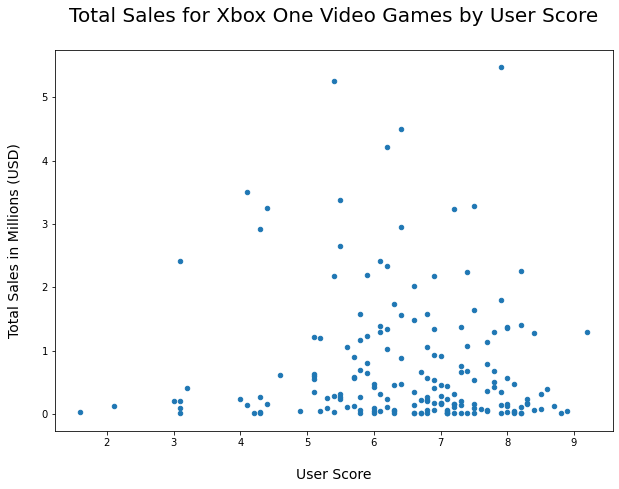

-0.06892505328279414

In [33]:
# Xbox One platform. User score vs total sales.
# Plot a scatter plot of the total sales based on the user score for each video game on the Xbox One platform
XOne_data = df.query('platform == "XOne"')
XOne_data.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,7))
plt.title('Total Sales for Xbox One Video Games by User Score\n', fontsize=20)
plt.xlabel('\nUser Score', fontsize=14)
plt.ylabel('Total Sales in Millions (USD)\n', fontsize=14)
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9], labels=['2', '3', '4','5','6','7','8','9'], fontsize=10)
plt.show()

# Calculate the correlation coefficient between the user score and the total sales for video games on the Xbox One
# platform
XOne_data['user_score'].corr(XOne_data['total_sales'])


There doesn't appear to be any pattern or relationship between user score ratings and the total sales of each video game for the Xbox One platform. This is confirmed with a **-0.0689** correlation coefficient, which means that there is a very weak negative relationship between the user ratings and the total sales. This doesn't make much sense in reality, and thus the concept of any relationship between the two values should be discarded altogether. 

#### Critic scores affect on total sales

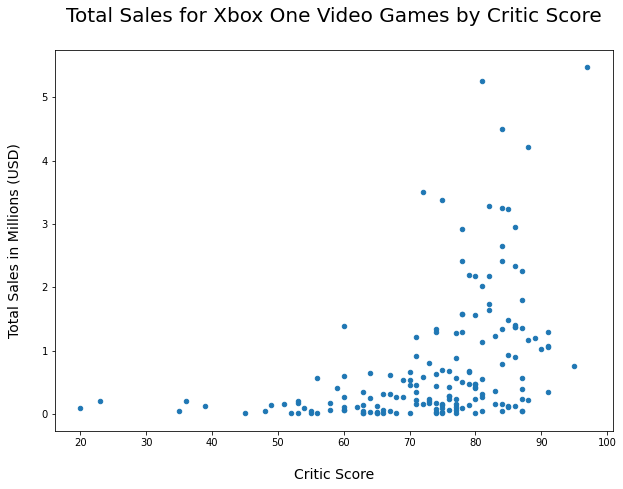

0.4169983280084017

In [34]:
# Xbox One platform. Critic score vs total sales.
# Plot a scatter plot of the total sales based on the user score for each video game on the Xbox One platform
XOne_data.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,7))
plt.title('Total Sales for Xbox One Video Games by Critic Score\n', fontsize=20)
plt.xlabel('\nCritic Score', fontsize=14)
plt.ylabel('Total Sales in Millions (USD)\n', fontsize=14)
plt.show()

# Calculate the correlation coefficient between the critic score and the total sales for video games on the Xbox One
# platform
XOne_data['critic_score'].corr(XOne_data['total_sales'])

There isn't a strong relationship between the critic score and total sales of each video game on the Xbox One platform. Some video games with really high critic scores do have really high total sales, but they're more the exception than the rule. It can be said that video games with a high critic rating have a much better chance of obtaining higher total sales, but it is not a given. This is confirmed by the **0.417** correlation coefficient, which shows that there is a weak relationship between the critic scores and the total sales of each video game.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done! 
</div>

### Looking at other platforms to confirm conclusions

To confirm our observations above, let's look at data for other popular platforms to see if they have the same relationships. We'll look at data for the PS4 and WiiU platforms.

#### PS4 user score affect on total sales

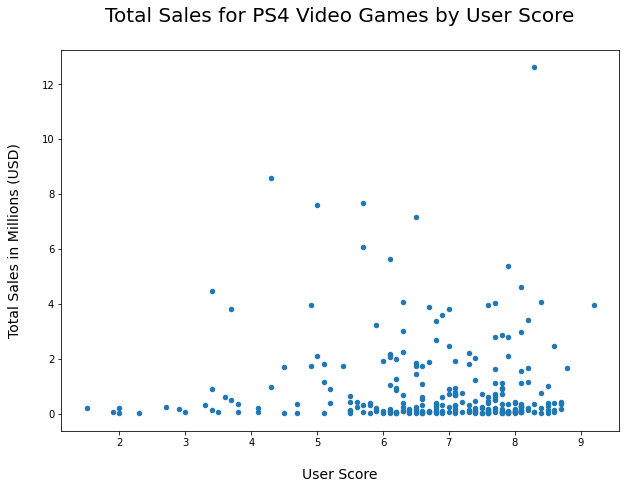

-0.031957110204556424

In [35]:
# PS4 platform. User score vs total sales.
# Plot a scatter plot of the total sales based on the user score for each video game on the PS4 platform
PS4_data = df.query('platform == "PS4"')
PS4_data.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,7))
plt.title('Total Sales for PS4 Video Games by User Score\n', fontsize=20)
plt.xlabel('\nUser Score', fontsize=14)
plt.ylabel('Total Sales in Millions (USD)\n', fontsize=14)
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9], labels=['2', '3', '4','5','6','7','8','9'], fontsize=10)
plt.show()

# Calculate the correlation coefficient between the user score and the total sales for video games on the PS4
# platform
PS4_data['user_score'].corr(PS4_data['total_sales'])

As was seen with the Xbox One data, there doesn't appear to be any pattern or relationship between the user ratings and the total sales of each video game. This is confirmed with a **-0.032** correlation coefficient, which means there is practially no relationship at all.

#### PS4 critic score affect on total sales

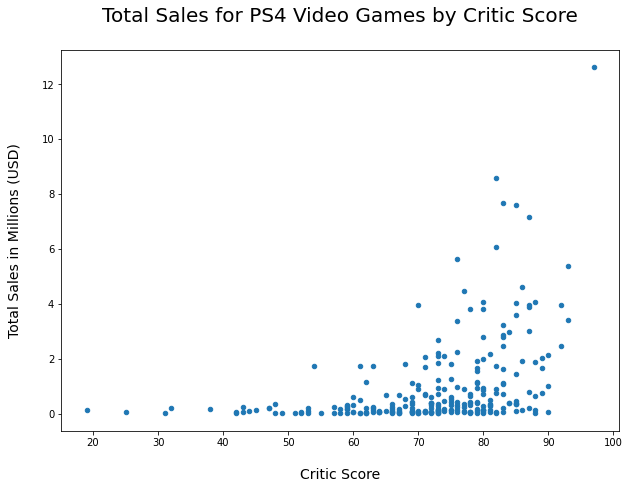

0.40656790206178095

In [36]:
# PS4 platform. Critic score vs total sales.
# Plot a scatter plot of the total sales based on the critic score for each video game on the PS4 platform
PS4_data.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,7))
plt.title('Total Sales for PS4 Video Games by Critic Score\n', fontsize=20)
plt.xlabel('\nCritic Score', fontsize=14)
plt.ylabel('Total Sales in Millions (USD)\n', fontsize=14)
plt.show()

# Calculate the correlation coefficient between the critic score and the total sales for video games on the PS4
# platform
PS4_data['critic_score'].corr(PS4_data['total_sales'])

Similar to what was seen with the Xbox One data, there isn't a strong relationship between the critic score and total sales of each video game. Again, some video games with really high critic scores also have really high total sales, but it is not guaranteed. There are fare more video games with really high critic scores that have the same total sales as video games with much lower critic scores. While a higher critic score generally means there is potential for really high sales, it cannot be stated by a concrete cause-and-effect relationship. This is confirmed by a correlation coefficient of **0.407**.

#### WiiU user score affect on total sales

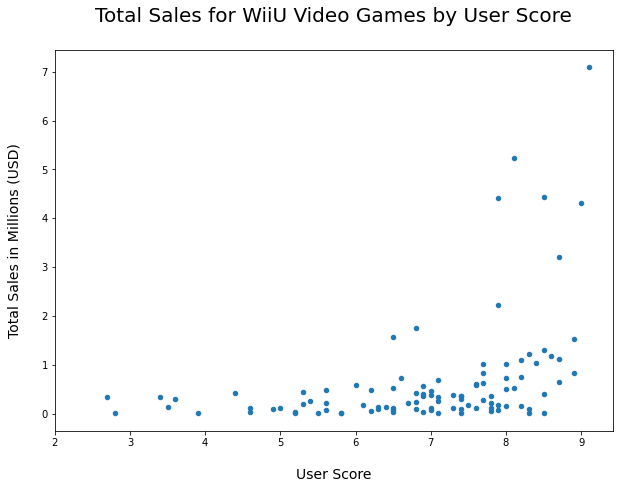

0.4002190202148617

In [37]:
# WiiU platform. User score vs total sales.
# Plot a scatter plot of the total sales based on the user score for each video game on the WiiU platform
WiiU_data = df.query('platform == "WiiU"')
WiiU_data.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,7))
plt.title('Total Sales for WiiU Video Games by User Score\n', fontsize=20)
plt.xlabel('\nUser Score', fontsize=14)
plt.ylabel('Total Sales in Millions (USD)\n', fontsize=14)
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9], labels=['2', '3', '4','5','6','7','8','9'], fontsize=10)
plt.show()

# Calculate the correlation coefficient between the user score and the total sales for video games on the WiiU
# platform
WiiU_data['user_score'].corr(WiiU_data['total_sales'])

For the WiiU paltform, there is a much stronger correlation between user ratings and global sales than was previously seen with the Xbox One and PS4 paltforms. The correlation coefficient was calculated to be approximiately **0.4**, which means that there is a correlation between the user ratings and global sales for video games of the WiiU platform, though not very strong. It can be concluded that higher user ratings for WiiU video games generally means that the global sales will be higher, but this is not always the case.

#### WiiU critic score affect on total sales

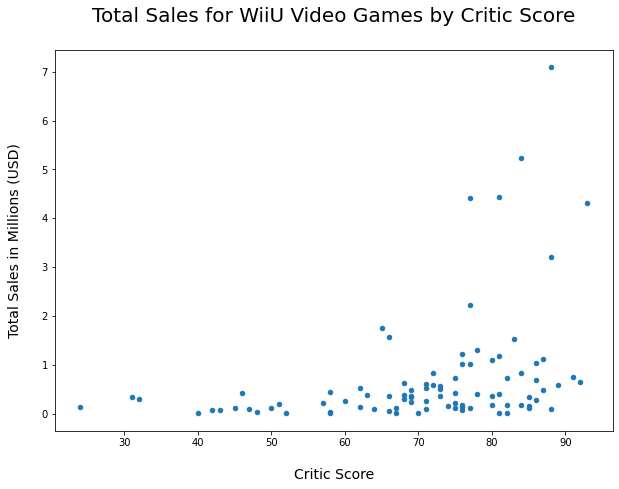

0.34837976012017485

In [38]:
# WiiU platform. Critic score vs total sales.
# Plot a scatter plot of the total sales based on the critic score for each video game on the WiiU platform
WiiU_data.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,7))
plt.title('Total Sales for WiiU Video Games by Critic Score\n', fontsize=20)
plt.xlabel('\nCritic Score', fontsize=14)
plt.ylabel('Total Sales in Millions (USD)\n', fontsize=14)
plt.show()

# Calculate the correlation coefficient between the critic score and the total sales for video games on the WiiU
# platform
WiiU_data['critic_score'].corr(WiiU_data['total_sales'])

As was seen with data from the Xbox One and PS4 platforms, there is not a strong relationship between critic ratings and the total sales of video games on the WiiU platform. A high critic rating means a video game has the potential for very high total sales, but as was observed earlier, high sales are not guaranteed. There are many more video games with high critic ratings and low total sales than there are high critic scores and high total sales. This observation is confirmed once again by a correlation coefficient of **0.348**.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct interpretation of the corellation. I like you have checked all three platforms, so we can see the big picture here.
</div>

### Distribution of games by genre

Now let's take a look at how video games are distributed amongst genres. In this section, we will plot two bar charts. One will display how many video games are in each genre category, and the other will show the median total global sales for video games of each genre category. By comparing both charts, we'll be able to make observations about profitable genres and what that may mean for future video games.

#### Plotting total video games by genre

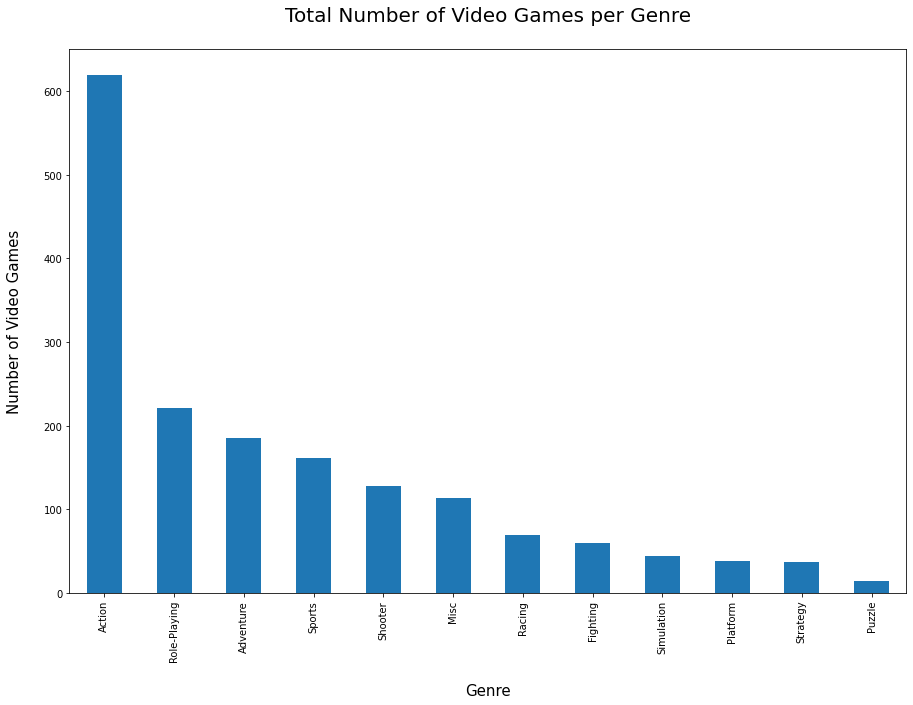

In [39]:
# Plot a bar chart displaying the total number of video games in each genre
sample_data.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,10))
plt.title('Total Number of Video Games per Genre\n', fontsize=20)
plt.xlabel('\nGenre', fontsize=15)
plt.ylabel('Number of Video Games\n', fontsize=15)
plt.show()

#### Plotting median total sales by genre

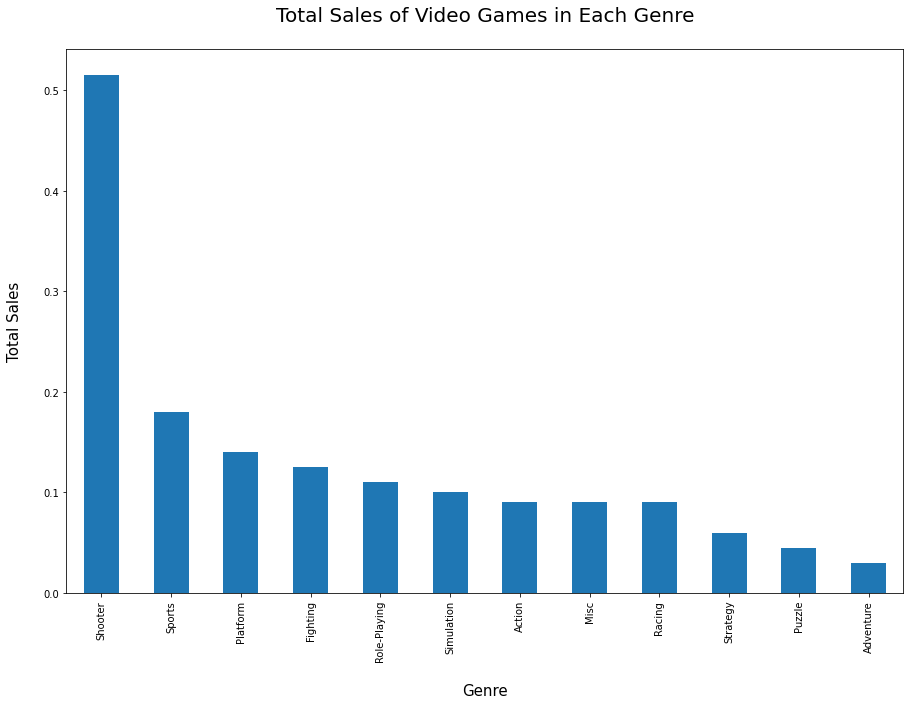

In [40]:
# Plot a bar chart displaying the total global sales of video games in each genre
sample_data.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', figsize=(15,10))
plt.title('Total Sales of Video Games in Each Genre\n', fontsize=20)
plt.xlabel('\nGenre', fontsize=15)
plt.ylabel('Total Sales\n', fontsize=15)
plt.show()

#### General observations

While the most video games belong to the Action genre, the median sales for video games of that genre is on the lower end at approximately **110,000 USD**. Additionally, the Adventure genre has a very large share of video games, but is reponsible for the least median total sales by video game in any other genre. On the other hand, there are much fewer video games in the Shooter genre, however that genre has the heighest median global sales out of any other video game genre.

Overall, we cannot make any conclusions about how profitable genres are based on how many video games are in those genres. However, it is easy to see that genres like Strategy and Puzzle have very small shares of video games and have some of the lowest video game sales.

In [41]:
# Let's check our above conclusion by calculating the correlation coefficient between median global sales of a genre
# and how many video games there are in that genre
sample_data.groupby('genre')['total_sales'].median().corr(df.groupby('genre')['name'].count())

0.062057865600651525

The above correlation coefficient value of approximately **0.0621** confirms the observation that there is no relationship between how many video games are in a genre and how profitable the genre is. There is no sense in Ice focusing on selling more populated genres, as there is no correlation to higher global sales.

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

When we are talking about sales, we have to be carefull how we look at them and interpretate. Total sales in this case is not the only metric which should be used to determine the most popular genre. We might have more total sales for action just because it has more small games with low sales. We should look here at median sales. How can we plot it? Also do not forget the titles for each axe on your graph.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Understood! I realize my mistake in summing the total sales instead of looking at the median total sales for video games of each genre. Instead of using the `sum()` method after grouping the data by `'genre'`, I applied the `median()` method. The bar chart is now different, and so are my findings. Thanks for pointing that out!
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Great!
</div>

## Looking at Popular Video Game Attributes for Each Region

We now want to get an idea of which kind of platforms, video game genres, and ESRB ratings are most popular (have the highest sales) in each of the three regions (NA, EU, JP). 

### Top Five Platforms (sales)

Let's look at the most popular platforms for each of the 3 regions. We will measure each platform's popularity by measuring how high the sales are in each region. In the below code cells, a data slice will be stored that contains the platforms each game is on, and the corresponding regional sales. Then, the data slice will be grouped by the platform names, the regional sales for each platorm will be summed, and the resulting table will be sorted by each region in descending order. To make it easier for the sorted column to be brought to the attention of the reader, the column that the data is sorted by will be highlighted.

Additionally, to visualize the data, a pie chart will be displayed of the most popular platforms in each region. The total regional sales will be plotted for the five or six most popular platforms, and then the remaining platforms will be grouped together under the category "Other". This will give a representation of the most popular platforms in each region, and how their market shares compare.

#### NA sales

In [42]:
# Group the data by platform, sum the regional sales, and sort by 'na_sales' in descending order
sample_data.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales', ascending=False)[0:5]\
.style.set_properties(**{'background-color': '#ffffb3'}, subset='na_sales')

/tmp/ipykernel_36/959624746.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sample_data.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales', ascending=False)[0:5]\


,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.610000,130.040000,15.020000
XOne,81.270000,46.250000,0.320000
X360,28.300000,15.490000,0.080000
3DS,22.640000,16.120000,44.240000
PS3,22.050000,25.540000,11.220000


/tmp/ipykernel_36/3620177927.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\


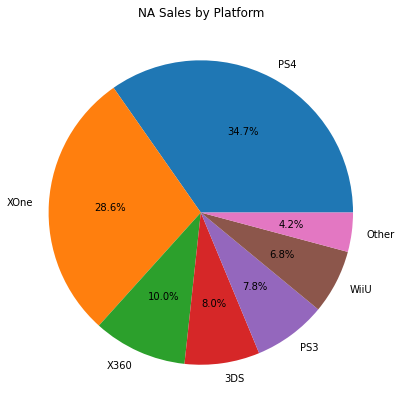

In [43]:
# Obtain the data slice containing the platforms and regional sales info, group data by platform, sum the regional
# sales
df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the platforms that will be plotted
plotted_platforms = df_platform['na_sales'].sort_values(ascending=False)[:6]

# Obtain the platforms that will be plotted as "Other"
other_platforms = df_platform['na_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_platforms Series
plotted_platforms.loc['Other'] = other_platforms

# Plot the data in a pie chart. Provide percentages. Change fontsize.
plotted_platforms.plot(kind='pie', figsize=(10,7), autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('NA Sales by Platform')
plt.ylabel('')
plt.show()

#### EU sales

In [44]:
# Group the data by platform, sum the regional sales, and sort by 'eu_sales' in descending order
sample_data.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='eu_sales', ascending=False)[0:5]\
.style.set_properties(**{'background-color': '#ffffb3'}, subset='eu_sales')

/tmp/ipykernel_36/1647077045.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sample_data.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='eu_sales', ascending=False)[0:5]\


,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.610000,130.040000,15.020000
XOne,81.270000,46.250000,0.320000
PS3,22.050000,25.540000,11.220000
PC,7.230000,17.970000,0.000000
3DS,22.640000,16.120000,44.240000


/tmp/ipykernel_36/403343894.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\


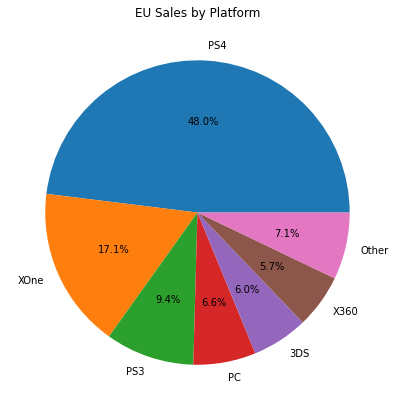

In [45]:
# Obtain the data slice containing the platforms and regional sales info, group data by platform, sum the regional
# sales
df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the platforms that will be plotted
plotted_platforms = df_platform['eu_sales'].sort_values(ascending=False)[:6]

# Obtain the platforms that will be plotted as "Other"
other_platforms = df_platform['eu_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_platforms Series
plotted_platforms.loc['Other'] = other_platforms

# Plot the data in a pie chart. Provide percentages. Change fontsize.
plotted_platforms.plot(kind='pie', figsize=(10,7), autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('EU Sales by Platform')
plt.ylabel('')
plt.show()

#### JP sales

In [46]:
# Group the data by platform, sum the regional sales, and sort by 'jp_sales' in descending order
sample_data.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='jp_sales', ascending=False)[0:5]\
.style.set_properties(**{'background-color': '#ffffb3'}, subset='jp_sales')

/tmp/ipykernel_36/2382755958.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sample_data.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='jp_sales', ascending=False)[0:5]\


,na_sales,eu_sales,jp_sales
platform,,,
3DS,22.640000,16.120000,44.240000
PS4,98.610000,130.040000,15.020000
PSV,2.520000,3.530000,14.540000
PS3,22.050000,25.540000,11.220000
WiiU,19.360000,13.150000,7.310000


/tmp/ipykernel_36/2559603659.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\


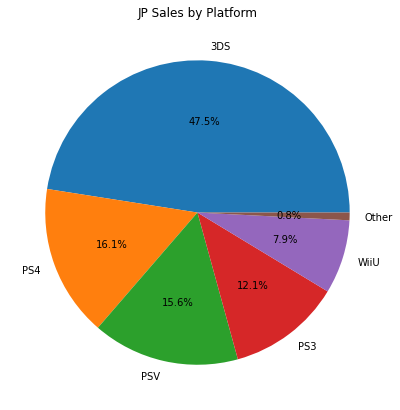

In [47]:
# Obtain the data slice containing the platforms and regional sales info, group data by platform, sum the regional
# sales
df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the platforms that will be plotted
plotted_platforms = df_platform['jp_sales'].sort_values(ascending=False)[:5]

# Obtain the platforms that will be plotted as "Other"
other_platforms = df_platform['jp_sales'].sort_values(ascending=False)[5:].sum()

# Add the Other value to the plotted_platforms Series
plotted_platforms.loc['Other'] = other_platforms

# Plot the data in a pie chart. Provide percentages. Change fontsize.
plotted_platforms.plot(kind='pie', figsize=(10,7), autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('JP Sales by Platform')
plt.ylabel('')
plt.show()

#### General observations

PS4

- The PS4 platform is very popular in all 3 regions. The highest sales of video games in both the NA and EU regions are for the PS4 platform. In the JP region, PS4 platform comes second only to the 3DS platform. The share of sales for the PS4 platform is always greater than a third of the sales, and is often closer to half the sales.

Xbox One

- The Xbox One is popular in both the NA and EU regions. It is responsible for the second highest sales of video games in both regions, with the PS4 taking the highest sales. The Xbox One does not break into the top 5 highest sales in the JP region.

Xbox 360

- The Xbox 360 platform is responsible for the third highest sales of video games in the NA region, however it does not break the top 5 sales in either the EU or JP region.

PS3

- The PS3 platform breaks the top 5 in all 3 regions. However, it is only responsible 5th, 3rd, and 4th highest sales in the NA, EU, and JP regions, respectively. It appears that the PS3 is on its way out.

3DS

- The 3DS is the most popular platform in the JP region, as it is responsible for the highest total sales in the region. The share of video games sales brought in by the 3DS platform is nearly 50% in the JP region, but only around 6% - 8% in the NA and EU regions.

PC

- The PC platform is still responsible for nearly 7% of video game sales in the EU region over the past 3 years. However it does not contribute to the top 5 sales in either of the NA or JP regions.

PSV and WiiU

- Both the PSV and WiiU are responsible for the 3rd and 5th highest video game sales in the JP region, respectively. But, neither platform is respnsible for high video game sales in either of the NA or EU regions.

After reviewing the above observations, the general conclusion I have is that new video games should be created to be compatible with the PS4 and Xbox One platforms in either the NA or EU regions. Whereas, if the target audience is in the JP region, then the video game should be created to be compatible with 3DS and PS4 platforms.

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

You have shown the perfect knowledge of `matplotlib` library. Please inroduce some graphs here to see clear the leaders of the market for each region. Maybe pie chart? 
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Understood! I have incorporated pie charts to visually display the shares of each platform. My findings changed due to being able to examine the data in such a neat and concise visual representation. The data used contained the video games released between 2014 and 2016. The next two sections contain pie charts plotted off the same data.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Well done!
</div>

### Top Five genres (sales)

Let's look at the which genres have the heighest sales in each region.

#### NA sales

In [48]:
# Group the data by genre, sum the regional sales, and sort by 'na_sales' in descending order
sample_data.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales', ascending=False)[0:5]\
.style.set_properties(**{'background-color': '#ffffb3'}, subset='na_sales')

/tmp/ipykernel_36/899821617.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sample_data.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales', ascending=False)[0:5]\


,na_sales,eu_sales,jp_sales
genre,,,
Shooter,79.020000,65.520000,4.870000
Action,72.530000,74.680000,29.580000
Sports,46.130000,45.730000,3.260000
Role-Playing,33.470000,28.170000,31.160000
Misc,15.050000,12.860000,5.610000


/tmp/ipykernel_36/1435785873.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\


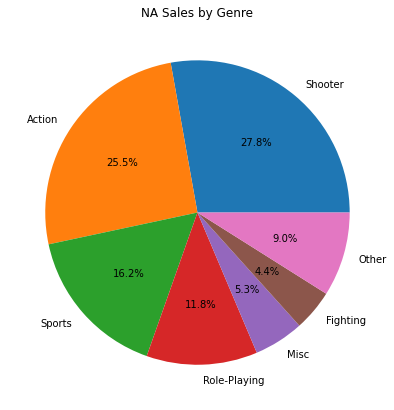

In [49]:
# Obtain the data slice containing the genre and regional sales info, group data by genre, sum the regional
# sales
df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the genres that will be plotted
plotted_genres = df_genre['na_sales'].sort_values(ascending=False)[:6]

# Obtain the genres that will be plotted as "Other"
other_genres = df_genre['na_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_genres Series
plotted_genres.loc['Other'] = other_genres

# Plot the data in a pie chart. Provide percentages. Change fontsize.
plotted_genres.plot(kind='pie', figsize=(10,7), autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('NA Sales by Genre')
plt.ylabel('')
plt.show()

#### EU sales

In [50]:
# Group the data by genre, sum the regional sales, and sort by 'eu_sales' in descending order
df_genre.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='eu_sales', ascending=False)[0:5]\
.style.set_properties(**{'background-color': '#ffffb3'}, subset='eu_sales')

/tmp/ipykernel_36/3198539284.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genre.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='eu_sales', ascending=False)[0:5]\


,na_sales,eu_sales,jp_sales
genre,,,
Action,72.530000,74.680000,29.580000
Shooter,79.020000,65.520000,4.870000
Sports,46.130000,45.730000,3.260000
Role-Playing,33.470000,28.170000,31.160000
Racing,8.740000,14.130000,1.760000


/tmp/ipykernel_36/1081634421.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\


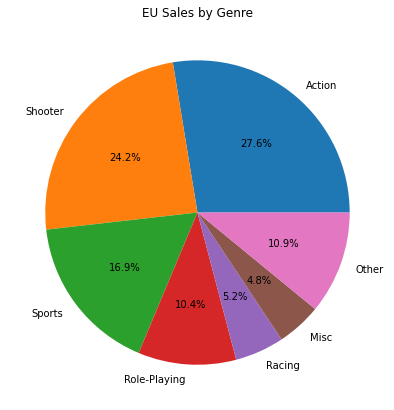

In [51]:
# Obtain the data slice containing the genre and regional sales info, group data by genre, sum the regional
# sales
df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the genres that will be plotted
plotted_genres = df_genre['eu_sales'].sort_values(ascending=False)[:6]

# Obtain the genres that will be plotted as "Other"
other_genres = df_genre['eu_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_genres Series
plotted_genres.loc['Other'] = other_genres

# Plot the data in a pie chart. Provide percentages. Change fontsize.
plotted_genres.plot(kind='pie', figsize=(10,7), autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('EU Sales by Genre')
plt.ylabel('')
plt.show()

#### JP Sales

In [52]:
# Group the data by genre, sum the regional sales, and sort by 'jp_sales' in descending order
df_genre.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='jp_sales', ascending=False)[0:5]\
.style.set_properties(**{'background-color': '#ffffb3'}, subset='jp_sales')

/tmp/ipykernel_36/1249607920.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genre.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='jp_sales', ascending=False)[0:5]\


,na_sales,eu_sales,jp_sales
genre,,,
Role-Playing,33.470000,28.170000,31.160000
Action,72.530000,74.680000,29.580000
Fighting,12.430000,6.690000,6.370000
Misc,15.050000,12.860000,5.610000
Shooter,79.020000,65.520000,4.870000


/tmp/ipykernel_36/2931525360.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\


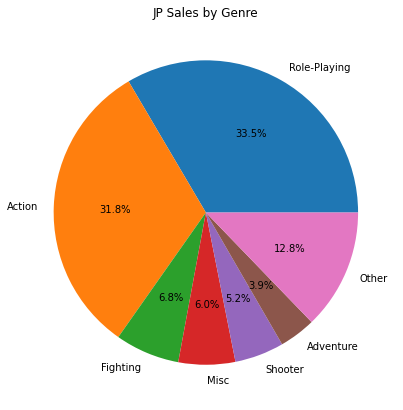

In [53]:
# Obtain the data slice containing the genre and regional sales info, group data by genre, sum the regional
# sales
df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the genres that will be plotted
plotted_genres = df_genre['jp_sales'].sort_values(ascending=False)[:6]

# Obtain the genres that will be plotted as "Other"
other_genres = df_genre['jp_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_genres Series
plotted_genres.loc['Other'] = other_genres

# Plot the data in a pie chart. Provide percentages. Change fontsize.
plotted_genres.plot(kind='pie', figsize=(10,7), autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('JP Sales by Genre')
plt.ylabel('')
plt.show()

Aciton

- The Action genre always has the heighest or 2nd heighest regional sales in any of the 3 regions, and is responsible for nearly 30% of the total video game sales in the 3 regions.

Shooter

- The Shooter genre acconts for approxiimately a quarter of the total video game sales in the NA and EU regions, but is only responsible for approximately 5% of total video game sales in the JP region.

Sports

- The Sports genre is responsible for approximately 16% - 17% of total video game sales in either the NA or EU regions, but does not contribute to the 5 highest video game sales by platform in the JP region.

Role-Playing

- Surprisingly, the genre with the heighest sales in the JP region is Role-Playing video games, which is responsible for approximately a third of all video game sales. However the Role-Playing genre is not as popular in either of the NA or EU regions, seeing as it is only responsible for approximately 11% of total video game sales over the past 3 years.

Platform
- The Platform genre breaks into the top 5 heighest regional sales in both the NA and JP regions, but does not break the top 5 heighest regional sales in the EU region. 

Racing

- Racing is responsible for 5% of total video game sales in the EU region over the past 3 years, but does not appear to be nearly as popular in either the NA or JP regions.

Miscellaneous

- The Miscellaneous genre accounts for %5 - 6% of video game sales in all 3 regions.

Fighting

- Lastly, the Fighting genre is responsible for approximately 7% of video game sales in the JP region, 4% of video game sales in the NA region, and only 2.5% of sales (not shown) in the EU region over the past 3 years.

After review of the above observations, new video games should be created in the Action genre to pursue audiences in all 3 regions. If the audience is just in the JP region, the the Role-Playing genre should be pursued in addition to Action genre. The Action genre is also semi-popular in both the NA and EU regions. If the target audience is just in the NA and EU regions, the the Shooter and Sports genres can be added to the Action genre in place of the Role-Playing genre for the JP region. 

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Here also the same comment above.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I have incorporated pie charts. The data used is of video games released between 2014 and 2016. My ouput has changed, and so have my findings.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Nicely done!
</div>

### Top ESRB Ratings

Let's determine if the ESRB ratings for video games have any affect on the regional sales.

In [54]:
# Replace the missing values with the string value 'Not Available'
# This will allow us to see what percent of data is missing for the ESRB Ratings by region

sample_data.loc[:,'rating'] = sample_data.loc[:,'rating'].fillna('Not Available')

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


#### NA sales

In [55]:
# Group the data by ESRB rating, sum the regional sales, and sort by 'na_sales' in descending order
sample_data.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales', ascending=False)\
.style.set_properties(**{'background-color': '#ffffb3'}, subset='na_sales')

/tmp/ipykernel_36/3824238581.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sample_data.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales', ascending=False)\


,na_sales,eu_sales,jp_sales
rating,,,
M,96.420000,93.440000,8.010000
Not Available,64.720000,58.950000,56.900000
E,50.740000,58.060000,8.940000
T,38.950000,34.070000,14.780000
E10+,33.230000,26.160000,4.460000


/tmp/ipykernel_36/2410939764.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\


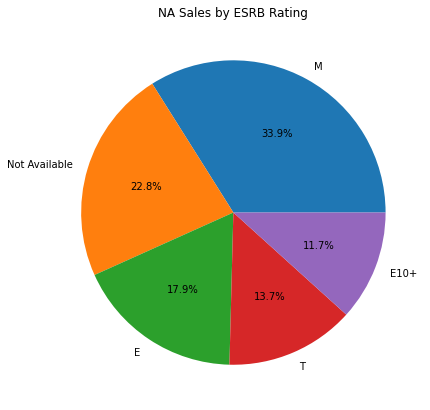

In [56]:
# Obtain the data slice containing the ESRB Rating and regional sales info, group data by ESRB Rating, sum the regional
# sales
df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the ESRB Rating that will be plotted
plotted_ratings = df_rating['na_sales'].sort_values(ascending=False)[:]

# Plot the data in a pie chart. Provide percentages. Change fontsize.
plotted_ratings.plot(kind='pie', figsize=(10,7), autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('NA Sales by ESRB Rating')
plt.ylabel('')
plt.show()

#### EU sales

In [57]:
# Group the data by ESRB rating, sum the regional sales, and sort by 'eu_sales' in descending order
sample_data.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='eu_sales', ascending=False)\
.style.set_properties(**{'background-color': '#ffffb3'}, subset='eu_sales')

/tmp/ipykernel_36/4026968229.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sample_data.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='eu_sales', ascending=False)\


,na_sales,eu_sales,jp_sales
rating,,,
M,96.420000,93.440000,8.010000
Not Available,64.720000,58.950000,56.900000
E,50.740000,58.060000,8.940000
T,38.950000,34.070000,14.780000
E10+,33.230000,26.160000,4.460000


/tmp/ipykernel_36/2825405404.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\


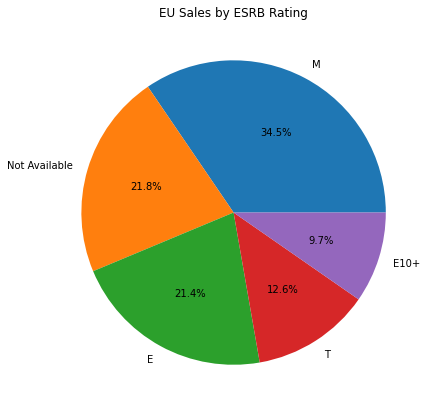

In [58]:
# Obtain the data slice containing the ESRB Rating and regional sales info, group data by ESRB Rating, sum the regional
# sales
df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the ESRB Rating that will be plotted
plotted_ratings = df_rating['eu_sales'].sort_values(ascending=False)[:]

# Plot the data in a pie chart. Provide percentages. Change fontsize.
plotted_ratings.plot(kind='pie', figsize=(10,7), autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('EU Sales by ESRB Rating')
plt.ylabel('')
plt.show()

#### JP sales

In [59]:
# Group the data by ESRB rating, sum the regional sales, and sort by 'jp_sales' in descending order
sample_data.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='jp_sales', ascending=False)\
.style.set_properties(**{'background-color': '#ffffb3'}, subset='jp_sales')

/tmp/ipykernel_36/1008086764.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sample_data.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='jp_sales', ascending=False)\


,na_sales,eu_sales,jp_sales
rating,,,
Not Available,64.720000,58.950000,56.900000
T,38.950000,34.070000,14.780000
E,50.740000,58.060000,8.940000
M,96.420000,93.440000,8.010000
E10+,33.230000,26.160000,4.460000


/tmp/ipykernel_36/2326186702.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\


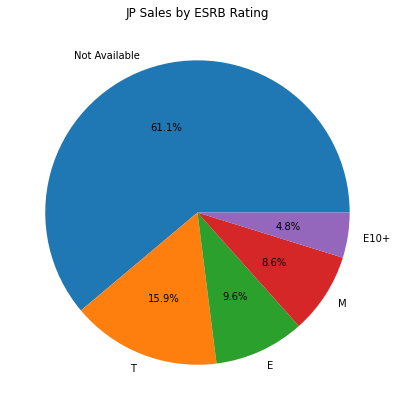

In [60]:
# Obtain the data slice containing the ESRB Rating and regional sales info, group data by ESRB Rating, sum the regional
# sales
df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the ESRB Rating that will be plotted
plotted_ratings = df_rating['jp_sales'].sort_values(ascending=False)[:]

# Plot the data in a pie chart. Provide percentages. Change fontsize.
plotted_ratings.plot(kind='pie', figsize=(10,7), autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('JP Sales by ESRB Rating')
plt.ylabel('')
plt.show()

Both the NA and EU regions appear to have very similar distributions of total sales for the same ESRB ratings. In both regions, video games rated `M` rating for mature are responsible for the highest sales. In both regions, roughly a third of video game sales are contributed by `M` rated games. Approximately 18% - 20% of video game sales are accounted for by games rated `E` for everyone, 13% of total sales is accounted for by games rated `T` for teen, and approximately 10% - 12% of sales are accounted for by games rated `E10+`. Additionally, nearly 22% of ESRB ratings in our dataset is unavailabe.

However, in the JP region the distribution of sales by ESRB rating is quite different. Over half of the ESRB ratings are unavailable, seeing as the `'Not Available'` label makes up 61.1% of the above pie chart for the JP region. Of the ratings that can be plotted, video games rated `T` for teen account for nearly 16% of total sales, which is fairly close to what was seen in the NA and EU regions. The `E` for everyone rating accounts for approximately 10% of total sales, which is about half the share that the `E` rating accounted for in the NA and EU regions. One of the biggest shockers is that video games rated `M` for mature only account for approximately 9% of total sales, whereas in the NA and EU regions `M` rated video games accounted for nearly a third of total sales. Finally, video games rate `E10+` account for approximately 5% of total sales in the JP region, which is about half the share seen for `E10+` video games in the NA or EU regions.

Ice should focus on selling `M` and `T` rated video games in both the NA and EU regions, and focus on selling `T` and `E` rated video games in the JP region. However, considering nearly a fifth of ratings are missing for the NA and EU regions, and over half of ratings are missing for the JP regions, accurate conclusions are very unlikely. There is no saying what the ratings could be for those missing values, which could easily change the size of the shares currently plotted.

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Also please consider the comments above. Here, also be carefull with missing values in rating column. Do you see the problem here? Maybe some values are not counted since they have missing values in the rating? We should fill the missing values with some random string in order them to be also in the plot.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Pie charts have been added to visually represent the data in the tables above. I replaced the missing values with the string `'Not Available'`, so that they would be included in the plotting. Due to the lifespan of data changing, as well, my outputs and findings have been updated and refined.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Now everything is correct! 
</div>

## Test the following hypotheses

After having analyzed the data above, let's test two hypotheses. The first hypothesis will be that the average user ratings for video games of the Xbox One and PC platforms are the same, and the second hypothesis will be that the average user ratings for video games of the Action and Sports genres are different.

### Testing if average user ratings of Xbox One and PC video games are the same

The null hypothesis will state that the average user ratings for video games of the Xbox One and PC platforms are equivalent. Thus, the alternative hypothesis will state that the average user ratings for video games of the Xbox One and PC platforms are NOT equivalent.

We'll begin the test by obtaining two samples of data, which will contain the video games that are created for the Xbox One or a PC platforms. The two samples will be stored in `df_user_ratings_XOne` and `df_user_ratings_PC`. Then, a t-test will be used to calculate the p-value that the average user ratings are equivalent. Both samples will be passed to the t-test function, as well as `equal_var=True`, since we're assuming that the variance of the two samples is the same. Finally, the resulting p-value will be used to determine if the null hypothesis can be rejected or not. The statistical significance level is assigned a value of 0.05, as that is a very common significance level. If the p-value is below the significance level of 0.05, the if-statement provided in the code block will display `'We can reject the null hypothesis'`. If the p-value is greater than the significance level of 0.05, then the if-statement in the code block will display `'We cannot reject the null hypothesis'`.

In [61]:
# Obtain the desired data slices for XOne and PC
df_user_ratings_XOne = sample_data.query('platform == "XOne" and ~user_score.isna()')['user_score']
df_user_ratings_PC = sample_data.query('platform == "PC" and ~user_score.isna()')['user_score']

# Initialize the statistical significance level as 0.05
alpha = 0.05

# Run the t-test, passing both samples and equal_var=True
results = st.ttest_ind(df_user_ratings_XOne, df_user_ratings_PC, equal_var=True)

# Print the p-value
print('p-value: ', round(results.pvalue,8))

# if-statement displaying the outcome
if results.pvalue < alpha:
    print('We can reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')

p-value:  0.10450508
We cannot reject the null hypothesis


The p-value of the t-test determining if the average user ratings of video games for the Xbox One or PC platforms are equivalent was calculated to be approximately **0.105**, which is greater than the significance level of **0.05**. Thus, the null hypothesis cannot be rejected, meaning that there is a decent chance that the average user ratings of video games for the Xbox One or PC platforms are equivalent. 

Let's calcualte the average, variance, and standard deviation values for the user ratings of video games for both the Xbox One and PC platforms.

In [62]:
# Obtain the means for both samples and print
XOne_average = df_user_ratings_XOne.mean()
PC_average = df_user_ratings_PC.mean()

# Obtain the variance
XOne_var = np.var(df_user_ratings_XOne)
PC_var = np.var(df_user_ratings_PC)

# Obtain the standard deviation
XOne_std = np.std(df_user_ratings_XOne)
PC_std = np.std(df_user_ratings_PC)


print('AVERAGE USER RATING: ')
print(f'Xbox One:   {round(XOne_average,2)}')
print(f'PC:         {round(PC_average,2)}')
print()
print('VARIANCES:')
print(f'Xbox One:   {round(XOne_var, 2)}')
print(f'PC:         {round(PC_var, 2)}')
print()
print('STANDARD DEVIATIONS:')
print(f'Xbox One:   {round(XOne_std,2)}')
print(f'PC:         {round(PC_std,2)}')


AVERAGE USER RATING: 
Xbox One:   6.59
PC:         6.3

VARIANCES:
Xbox One:   1.88
PC:         2.88

STANDARD DEVIATIONS:
Xbox One:   1.37
PC:         1.7


The averages are fairly close to one another, and the difference between them is small enough to support that the averages being equal is probable to some extent.

### Testing if average user ratings for Action and Sports video games are different

The null hypothesis will state that the average user ratings of Action and Sports video games are equivalent. Thus, the alternative hypothesis will state that the average user ratings Action and Sports video games are NOT equivalent.

We'll begin the test by obtaining two samples of data, which are just the video games under the Action or Sports genre. The two samples will be stored in `df_action_ratings` and `df_sports_ratings`. Then, a t-test will be used to calculate the p-value. Both samples will be passed to the t-test function, as well as `equal_var=False`, since we're assuming that the variance of the two samples are NOT the same. Finally, the resulting p-value will be used to determine if the null hypothesis can be rejected or not. The statistical significance level is assigned a value of 0.05, as that is a very common significance level. If the p-value is below the significance level of 0.05, the if-statement provided will display `'We can reject the null hypothesis'`. If the p-value is greater than the significance level of 0.05, then the if-statement will display `'We cannot reject the null hypothesis'`.

In [63]:
# Obtain the desired data slices for Action and Sports genres
df_action_ratings = sample_data.query('genre == "Action" and ~user_score.isna()')['user_score']
df_sports_ratings = sample_data.query('genre == "Sports" and ~user_score.isna()')['user_score']

# Initialize the statistical significance level as 0.05
alpha = 0.05

# Run the t-test, passing both samples and equal_var=False
results = st.ttest_ind(df_action_ratings, df_sports_ratings, equal_var=False)

# Print the p-value
print('p-value: ', results.pvalue)

# if-statement displaying the outcome
if results.pvalue < alpha:
    print('We can reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')

p-value:  1.1825550382644557e-14
We can reject the null hypothesis


The p-value of the t-test determining if the average user ratings of video games of the Action or Sports genres are equivalent was calculated to be **0.0000000000000118**, which is significantly lower than the significance level of **0.05**. Thus, the null hypothesis can be rejected, meaning that there is practically no probability that the average user ratings of video games of the Action and Sports genres are equivalent.

Let's calculate the average, variance, and standard deviation values for the user ratings of video games of both the Action or Sports genres.

In [64]:
# Obtain the means for both samples and print
Action_average = df_action_ratings.mean()
Sports_average = df_sports_ratings.mean()

# Obtain the variance
Action_var = np.var(df_action_ratings)
Sports_var = np.var(df_sports_ratings)

# Obtain the standard deviation
Action_std = np.std(df_action_ratings)
Sports_std = np.std(df_sports_ratings)


print('AVERAGE USER RATING: ')
print(f'Action:   {round(Action_average,2)}')
print(f'Sports:   {round(Sports_average,2)}')
print()
print('VARIANCES:')
print(f'Xbox One:   {round(Action_var, 2)}')
print(f'PC:         {round(Sports_var, 2)}')
print()
print('STANDARD DEVIATIONS:')
print(f'Xbox One:   {round(Action_std,2)}')
print(f'PC:         {round(Sports_std,2)}')

AVERAGE USER RATING: 
Action:   6.76
Sports:   5.23

VARIANCES:
Xbox One:   1.89
PC:         3.42

STANDARD DEVIATIONS:
Xbox One:   1.38
PC:         1.85


The average user ratings for both genres are not close to each other, which does not support the hyptothesis that there is a decent probability that the averages are equivalent. The sizeable difference between the averages supports rejecting the null hypothesis.

<div class="alert alert-block alert-danger">

<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Because of filling method of the missing values in column user_score your results in the first part of this chapter 5 are not correct. As I have commented above, either leave them as it is or just change them to some random number or string.
</div>

<div class="alert alert-block alert-info">
<s><b>Student answer.</b> <a class="tocSkip"></a>

Understood! I've revisited the results above since leaving the missing values as they are. The p-values were calculated to have different values than previously thought. However, they appear to maintain the same conclusions regarding rejecting or not rejecting the null hypothesis. Is this correct?
</div>

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Remember, here we want to analyze the filtered data. You took the whole dataset and some platforms which were filtered out are included here, that's why your hyphotes test is not correct. Please correct it and your project will perfect:)
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Ah, understood! I see the issue now. I've substitued in the `sample_data` for `df`, since the `sample_data` only contains video games released between 2014 and 2016. I have updated my findings accordingly. Thanks!
</div>

## Conclusion

### Actions taken

At the beginning of this report the necessary libraries and data were imported and loaded. The data was stored in the `df` DataFrame. After looking at the DataFrame's summary info and a preview of the first 15 rows of the data, it was determined that there were a few columns with missing values, as well as incorrect data types. The following columns contained missing values:

- name
- year_of_release
- genre
- critic_score
- user_score
- rating

Only 2 rows contained missing values in the `'name'` column, so they were simply removed. A portion of the missing values in the `'year_of_release'` column were replaced by taking the average year of release of other versions of the same game for different platforms. The rows with missing values in the `'year_of_release'` column were simply removed from the DataFrame since they accounted for such a small portion of the entire dataset. Once the missing values were removed from the `'year_of_release'` column, the data type for the `'year_of_release'` column was converted to `int64`, so that the values would be integers. After removal of the rows from the `'name'` and `'year_of_release'` columns, no rows remained that contained missing values in the `'genre'` column. Roughly a third of rows in the `'critic_score'` and `'user_score'` columns contained missing values, and therefore could not just be removed. However, there was no accurate way to repalce the missing values, so they were left alone for the time being. I did not make any changes to the missing values in the `'rating`' column, as I was unaware of an accurate way to replace the missing values. Also, it was only necessary to have a sample of data with usable values in the `'rating'` column for analyzing if the sales for video games in different regions were effected by the ESRB ratings.

The last action taken before analysis could be started was that an additional column was added to the DataFrame that contained the total sales for each video game. This was done by summing the regional sales in the NA, EU, JP, and Other regions.

Once the data had been processed and currated for analysis, the following aspects of the data were examined:

- Distribution of games released by year
- Distribution of games released by platform
- Distribution of total sales based on year for each platform
- User rating correlation with total sales
- Critic rating correlation with total sales
- 5 most popular platforms by region
- 5 most popular genres by region
- ESRB rating effect on sales by region

Not only were tables utilized to group the data together for examinaton, but visual representations were created using the following plots:

- Bar Chart
- Scatter Plot
- Boxplot

Lastly, two hypotheses were also tested as to whether they could be rejected or not. The first hypothesis tested was that the average user rating for video games on the Xbox One or PC platform were the same. The second hypthesis tested was that the average user rating for video games of the Action or Sports genre were different. These hypotheses were tested using t-tests.

### Final conclusion

After review of all the analysis performed throughout the report, a few conclusions were made, which are listed below:

User and critic rating correlations:
- No correlation between user ratings and total sales were seen except for the WiiU platform, which was still weak
- Very weak correlation between critic ratings and total sales

Popular platforms
- Platforms currently growing/leading sales are Xbox One and PS4

Genres
- Most popular genre is Action
- Shooter and Sports genres are also popular in the NA and EU regions
- Role-Playing genre is also popular in the JP region

ESRB Ratings
- ESRB ratings did have an affect on regional sales. 
- Sales by ESRB Ratings were the same in NA and EU, but different in JP.

Hypotheses
- We reject the null hypothesis that the average user ratings of Xbox One and PC platforms are equivalent
- We cannot reject the null hypothesis that the average user ratings for Action and Sports genre are equivalent

Overall, determining if a video game will be successful in 2017 depends on the region, platform, genre, and ESRB rating. Video games will be successful if they are compatible with the Xbox One and PS4 platforms. If the video game is mainly sold in the JP region, then it will be successful if it is compatible with the 3DS platform. Video games of the Action genre will be the most successful. The Shooter and Sports genres will also be successful in the NA and EU regions, while the Role-Playing genre will be successful in the JP region. Lastly, video games of the rated M will be most popular in the NA and EU regions, while it was hard to conclude which ESRB rating is most popular in the JP region due to the large portion of missing data.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I really enjoyed to review your work! I can see your good skills with phyton! Good ideas, right directions! Everything is there!
</div>

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Just correct the points I have mentioned above and your project will be done! I am sure you can do it! Looking forward for it!
</div>

<div class="alert alert-block alert-info">
<s><b>Student answer.</b> <a class="tocSkip"></a>

Maksim, thank you for reviewing my project! I have tried my best to implement your comments and adjust my findings as necessary. 

I left most of the missing data alone initially. I converted all the `'tbd'` values to `NaN`. Later, when plotting the ESRB values in a pie chart, I replaced all the `NaN` values with the string value `'Not Available'`.    

I struggled with finding an efficient way to plot boxplots all on one chart. I was able to do it, but the code was ugly.
    
I redefined the span of years for the video game data we would later analyze (2014-2016). This changed my data and outputs quite a bit so I went through and updated everything as best I could.
    
I provided pie charts to visually represent the tables I had previously analyzed. It was much easier using the pie charts.
    
Titles and lables have been added to all plots.
    
Please let me know if anything remains that I need to change. Thanks!
</div>

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Just correct that last point above and your project is good to go! Really like the work you have accompished! 
</div>


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I have reworkd the section testing the hypotheses. Thank you for reviewing my project and for your help!
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Great work! I really enjoyed reviewing it! I like your structure and report is easy to follow and read! Good luck with your further projects! 
</div>
